# Witcher Project



In [7]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [8]:
base_url = 'https://witcher.fandom.com/wiki/'

In [23]:
html_text = requests.get(base_url + 'Category:Characters_in_the_stories').text
soup = BeautifulSoup(html_text, 'lxml')

In [24]:
books = soup.find_all('a',class_ = 'category-page__member-link')

In [32]:
result = []

In [35]:
for i in books:
    print(i.text)

Category:Baptism of Fire characters
Category:Blood of Elves characters
Godamba Thaess'en
Category:Season of Storms characters
Category:Something Ends, Something Begins characters
Category:Sword of Destiny characters
Category:Szpony i kły characters
Category:Tales from the world of The Witcher characters
Category:The Lady of the Lake characters
Category:The Last Wish characters
Category:The Tower of the Swallow characters
Category:Time of Contempt characters


In [45]:
for i in books:
    html_chrs = requests.get(base_url + i.text).text
    soup_chrs = BeautifulSoup(html_chrs,'lxml')
    chrs = soup_chrs.find_all('a',class_ = 'category-page__member-link')
    for c in chrs:
        #print(c.text)
        result.append({'title':i.text[9:-11], 'character':c.text})
print(result)

[{'title': 'Baptism of Fire', 'character': 'Category:Baptism of Fire characters'}, {'title': 'Baptism of Fire', 'character': 'Category:Blood of Elves characters'}, {'title': 'Baptism of Fire', 'character': "Godamba Thaess'en"}, {'title': 'Baptism of Fire', 'character': 'Category:Season of Storms characters'}, {'title': 'Baptism of Fire', 'character': 'Category:Something Ends, Something Begins characters'}, {'title': 'Baptism of Fire', 'character': 'Category:Sword of Destiny characters'}, {'title': 'Baptism of Fire', 'character': 'Category:Szpony i kły characters'}, {'title': 'Baptism of Fire', 'character': 'Category:Tales from the world of The Witcher characters'}, {'title': 'Baptism of Fire', 'character': 'Category:The Lady of the Lake characters'}, {'title': 'Baptism of Fire', 'character': 'Category:The Last Wish characters'}, {'title': 'Baptism of Fire', 'character': 'Category:The Tower of the Swallow characters'}, {'title': 'Baptism of Fire', 'character': 'Category:Time of Contempt

In [46]:
df = pd.DataFrame(result)
df

,title,character
0,Baptism of Fire,Category:Baptism of Fire characters
1,Baptism of Fire,Category:Blood of Elves characters
2,Baptism of Fire,Godamba Thaess'en
3,Baptism of Fire,Category:Season of Storms characters
4,Baptism of Fire,"Category:Something Ends, Something Begins char..."
...,...,...
6514,Time of Contempt,Yanna of Murivel
6515,Time of Contempt,Yarpen Zigrin
6516,Time of Contempt,Yennefer of Vengerberg
6517,Time of Contempt,Yiolenta Suarez


<function matplotlib.pyplot.show(close=None, block=None)>

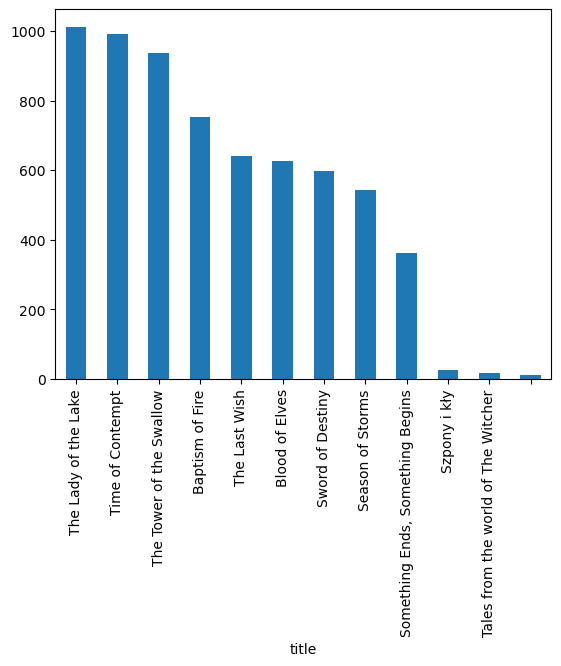

In [48]:
import matplotlib.pyplot as plt
df['title'].value_counts().plot(kind = 'bar')
plt.show